In [4]:
###############################################################################
# EvoMan FrameWork - V1.0 2016  			                                  #
# DEMO : Neuroevolution - Genetic Algorithm  neural network.                  #
# Author: Karine Miras        			                                      #
# karine.smiras@gmail.com     				                                  #
###############################################################################

# imports framework
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os
import matplotlib.pyplot as plt


# choose this for not using visuals and thus making experiments faster
headless = True
if headless:
    os.environ["SDL_VIDEODRIVER"] = "dummy"


experiment_name = 'optimization_test'
if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)


# Evaluate an individual
def simulation(env, x):
    f, _, _, _ = env.play(pcont=x)
    return f

# Evaluate a population
def evaluate(pop):
    return np.array([simulation(env, ind) for ind in pop])

# Perform Gaussian mutation
def mutate(ind, sigma):
    return ind + sigma * np.random.randn(*ind.shape)

# Adapt mutation step sizes
def adapt_sigma(sigma):
    tau = 1 / np.sqrt(2 * np.sqrt(n_vars))
    return sigma * np.exp(tau * np.random.randn(*sigma.shape))

# deterministic elitist replacement
def survivor_selection(population, fit_pop, offspring, fit_offspring, sigmas, offspring_sigmas):
    # Combine populations, fitnesses, and sigmas
    combined_pop = np.vstack((population, offspring))
    combined_fit = np.hstack((fit_pop, fit_offspring))
    combined_sigmas = np.vstack((sigmas, offspring_sigmas))

    # Sort by fitness
    sorted_indices = np.argsort(combined_fit)[::-1]

    # Select top npop individuals
    survivor_indices = sorted_indices[:npop]

    return combined_pop[survivor_indices], combined_fit[survivor_indices], combined_sigmas[survivor_indices]

# Perform Reproduction
def reproduction(pop, fit_pop):
    offspring = np.zeros((noffspring, n_vars))
    offspring_sigmas = np.zeros((noffspring, n_vars))

    for i in range(noffspring):
        # choose parents by indices
        parent_indices = np.random.choice(pop.shape[0], nparents, replace=False)

        # intermediary recombination for sigma
        offspring_sigma = np.mean([sigmas[x] for x in parent_indices], axis=0)

        # discrete recombination for the offspring
        parents = pop[parent_indices]
        for x in range(n_vars):
            offspring[i, x] = parents[np.random.randint(nparents)][x]

        # mutation of offspring using new sigma
        offspring[i] = mutate(offspring[i], offspring_sigma)

        # mutation of sigma and store
        offspring_sigma = adapt_sigma(offspring_sigma)
        offspring_sigmas[i] = offspring_sigma

    return offspring, offspring_sigmas


for enemy_number in [1,7,8]
    n_hidden_neurons = 10

    # initializes simulation in individual evolution mode, for single static enemy.
    env = Environment(experiment_name=experiment_name,
                    enemies=[enemy_number],
                    playermode="ai",
                    player_controller=player_controller(n_hidden_neurons), # you  can insert your own controller here
                    enemymode="static",
                    level=2,
                    speed="fastest",
                    visuals=False)


    # number of weights for multilayer with 10 hidden neurons
    n_vars = (env.get_num_sensors()+1)*n_hidden_neurons + (n_hidden_neurons+1)*5

    # start writing your own code from here

    npop = 25
    gens = 40
    noffspring = 100
    nparents = 2 # for recombination we can use >=2 parents
    dom_l = -1  # Lower bound for initialization
    dom_u = 1   # Upper bound for initialization


    # Initialize mutation step sizes
    sigmas = np.random.uniform(0.1, 1, (npop, n_vars))



    #store each of results for n parents in a dictionary
    best_fitness_dict = {}
    mean_fitness_dict = {}
    #run the algorithm for 2 and 4 parents
    for nparents in [2,4]:
        #store each run in lists
        best_fitnesses = []
        mean_fitnesses = []
        for test_index in range(10):

            # Initialize population
            population = np.random.uniform(dom_l, dom_u, (npop, n_vars))
            fit_pop = evaluate(population)

            best_fitness_vector = []
            mean_fitness_vector = []
            for gen in range(gens):
                # Create offspring via mutation
                offspring, offspring_sigmas = reproduction(population, fit_pop)
                fit_offspring = evaluate(offspring)

                # Survivor selection
                population, fit_pop, sigmas = survivor_selection(population, fit_pop, offspring, fit_offspring, sigmas, offspring_sigmas)
                # Monitoring
                best_fit = np.max(fit_pop)
                mean_fit = np.mean(fit_pop)
                std_fit = np.std(fit_pop)
                print(f"GENERATION {gen} Best fitness: {best_fit:.6f}\nMean fitness: {mean_fit:.6f}\nStandard deviation {std_fit:.6f}\n\n")

                #save the best and mean fitness for each gen
                best_fitness_vector.append(best_fit)
                mean_fitness_vector.append(mean_fit)

            #store each run vector in lists
            best_fitnesses.append(best_fitness_vector)
            mean_fitnesses.append(mean_fitness_vector)


        #append the result of 10 tests into dictionaries
        run_name = f'parent_{nparents}'
        best_fitness_dict[run_name] = best_fitnesses
        mean_fitness_dict[run_name] = mean_fitnesses






    best_run_2_parent = np.mean(best_fitness_dict['parent_2'], axis=0)
    best_run_4_parent = np.mean(best_fitness_dict['parent_4'], axis=0)
    mean_run_2_parent = np.mean(mean_fitness_dict['parent_2'], axis=0)
    mean_run_4_parent = np.mean(mean_fitness_dict['parent_4'], axis=0)

    x = np.arange(1, 11)

    plt.figure(figsize=(10, 6))
    plt.title(f'Mean and Best Fitness vs Generations 2-4 Parent Enemy {enemy_number}')
    plt.plot(x, best_run_2_parent, label='Best Fitness (2 Parent)', marker='o')
    plt.plot(x, best_run_4_parent, label='Best Fitness (4 Parent)', marker='o')
    plt.plot(x, mean_run_2_parent, label='Mean Fitness (2 Parent)', marker='o')
    plt.plot(x, mean_run_4_parent, label='Mean Fitness (4 Parent)', marker='o')
    plt.xlabel('Generations')
    plt.ylabel('Fitness Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    
    
    
    
    
    
    



MESSAGE: Pygame initialized for simulation.
GENERATION 0 Best fitness: 39.179917
Mean fitness: 7.248480
Standard deviation 13.607278


GENERATION 1 Best fitness: 66.013548
Mean fitness: 23.013310
Standard deviation 14.293286


GENERATION 2 Best fitness: 66.013548
Mean fitness: 38.305848
Standard deviation 10.112737


GENERATION 3 Best fitness: 66.013548
Mean fitness: 42.312631
Standard deviation 6.634466


GENERATION 4 Best fitness: 75.070411
Mean fitness: 49.188698
Standard deviation 10.241725


GENERATION 5 Best fitness: 75.070411
Mean fitness: 50.960131
Standard deviation 9.052619


GENERATION 6 Best fitness: 75.070411
Mean fitness: 52.753158
Standard deviation 8.101821


GENERATION 7 Best fitness: 75.070411
Mean fitness: 53.481463
Standard deviation 7.653354


GENERATION 8 Best fitness: 75.070411
Mean fitness: 54.208624
Standard deviation 7.517988


GENERATION 9 Best fitness: 94.785064
Mean fitness: 56.441923
Standard deviation 10.704789


GENERATION 0 Best fitness: 39.139214
Mean

[[65.51689264854281,
  65.51689264854281,
  65.51689264854281,
  75.21617481767026,
  75.21617481767026,
  75.21617481767026,
  75.21617481767026,
  75.21617481767026,
  75.21617481767026,
  75.21617481767026],
 [39.013547994715566,
  66.01354799471557,
  66.02364909070207,
  75.01354799471557,
  75.01354799471557,
  75.01354799471557,
  75.01354799471557,
  75.01354799471557,
  75.01354799471557,
  94.9001335721758],
 [39.14206684551654,
  48.0704108566101,
  57.01858578874552,
  66.17991706964764,
  88.40317628172515,
  88.40317628172515,
  88.40317628172515,
  88.40317628172515,
  88.40317628172515,
  88.40317628172515]]

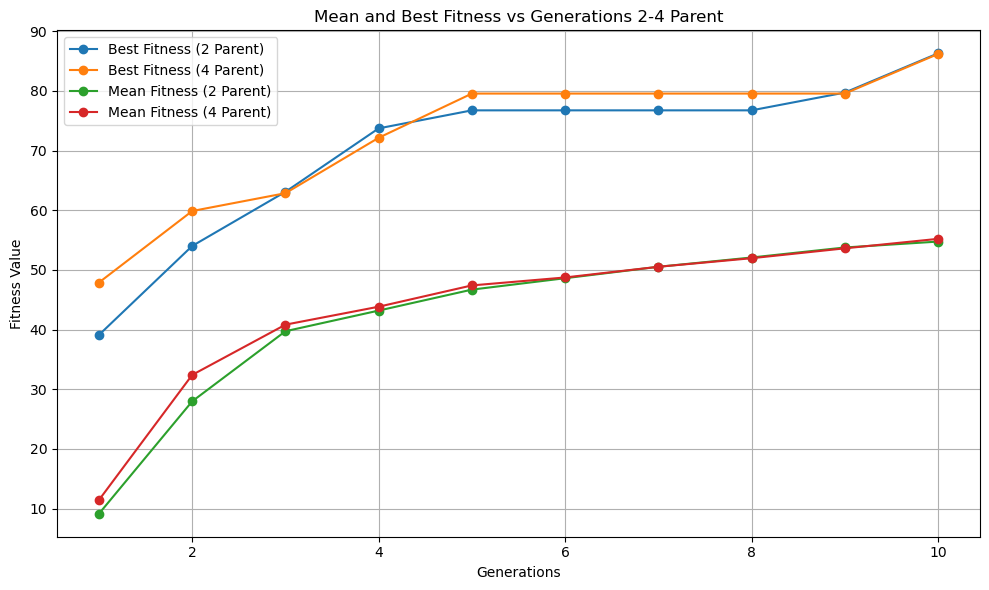

In [16]:
import matplotlib.pyplot as plt

best_run_2_parent = np.mean(best_fitness_dict['parent_2'], axis=0)
best_run_4_parent = np.mean(best_fitness_dict['parent_4'], axis=0)
mean_run_2_parent = np.mean(mean_fitness_dict['parent_2'], axis=0)
mean_run_4_parent = np.mean(mean_fitness_dict['parent_4'], axis=0)

x = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.title('Mean and Best Fitness vs Generations 2-4 Parent')
plt.plot(x, best_run_2_parent, label='Best Fitness (2 Parent)', marker='o')
plt.plot(x, best_run_4_parent, label='Best Fitness (4 Parent)', marker='o')
plt.plot(x, mean_run_2_parent, label='Mean Fitness (2 Parent)', marker='o')
plt.plot(x, mean_run_4_parent, label='Mean Fitness (4 Parent)', marker='o')
plt.xlabel('Generations')
plt.ylabel('Fitness Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])